In [0]:
#IIR
import numpy as np
import matplotlib.pyplot as plt

fs = 1000

noise_t = np.random.normal(0,1,10000)

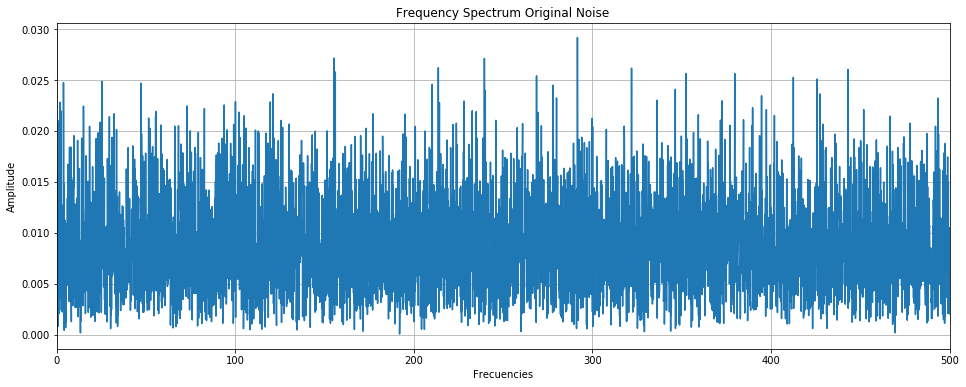

In [2]:
noise_f = np.fft.ifft(noise_t)

f_axis = np.linspace(0,fs,len(noise_t))

fig1 = plt.figure(figsize=(16,6))
plt.title("Frequency Spectrum Original Noise")
plt.xlabel("Frecuencies")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0,fs/2)
plt.plot(f_axis,abs(noise_f))
plt.show()
#fig1.savefig("Frequency spectrum original noise.svg")

In [0]:


class IIR_filter:
    def __init__(self):
        
        self.orden = 2
        self.control = 0
        self.buffer = list()
     
    def iir_filter(self,value,mode,f1,*f2):
        
        import numpy as np
        import scipy.signal as signal
        
        if self.control == 0: 
            self.control = 1
            self.sos = signal.butter(1,[f1,*f2],mode,output="SOS")
            self.b = self.sos[0][:3]
            self.a = self.sos[0][3:]
            for i in range(self.orden):
                self.buffer.append(np.zeros(len(self.b)))

        self.acc1 = value
        
        for k in range(self.orden):
            for i in range(1,len(self.buffer[k])):
                self.acc1 = self.acc1 - (self.a[i] * self.buffer[k][i])
       
            self.acc2 = self.acc1 * self.b[0]
        
            for j in range(1,len(self.buffer[k])):
                self.acc2 = self.acc2 + (self.b[j] * self.buffer[k][j])

            self.buffer[k][1:] = self.buffer[k][:-1]
            self.buffer[k][1] = self.acc1
            self.acc1 = self.acc2
       
        return self.acc2



In [0]:
# Corner frequencies
f1=2*(40/fs)
f2=2*(50/fs)

In [0]:


prube = IIR_filter()
prube.control = 0

##### CHANGE MEEEEE!!!!!
prube.orden = 20

result = list()

for i in range(len(noise_t)): # This for loop simulates data in in a real time system
    result.append(prube.iir_filter(noise_t[i],"Lowpass",f2))



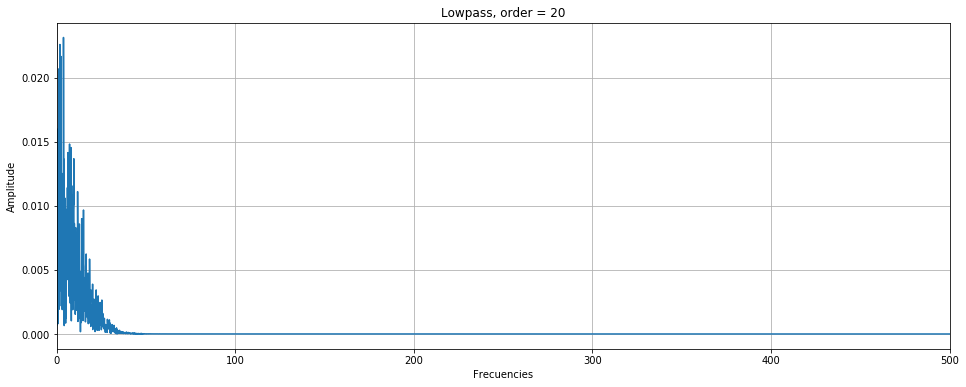

In [6]:
result_f = np.fft.ifft(result)

fig2 = plt.figure(figsize=(16,6))
plt.title("Lowpass, order = 20")
plt.xlabel("Frecuencies")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0,fs/2)
plt.plot(f_axis,abs(result_f))
plt.show()
fig2.savefig("Lowpass, order = 20.svg")